In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [4]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

# 用tf.data读取list

In [5]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [6]:
for elem in dataset:
  print(elem.numpy())

8
3
0
8
2
1


# 用tf.data读取numpy数据

In [7]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [8]:
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

# tf.data数据产生函数

In [9]:
def count(stop):
  i = 0
  while i<stop:
    yield i
    i += 1

In [10]:
for n in count(5):
  print(n)

0
1
2
3
4


In [11]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes = (), )

In [12]:
for count_batch in ds_counter.repeat().batch(10).take(10):
  print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


# 用tf.data读取TFRecord数据

In [13]:
# Creates a dataset that reads all of the examples from two files.
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")

In [14]:
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

# 用tf.data读取文本数据

In [15]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

In [16]:
dataset = tf.data.TextLineDataset(file_paths)

In [17]:
for line in dataset.take(5):
  print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


# 利用高级API读取图片

In [18]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [19]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [20]:
print(flowers)

C:\Users\toki\.keras\datasets\flower_photos


In [21]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


# 用tf.data读取表格数据

In [22]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [23]:
df = pd.read_csv(titanic_file, index_col=None)
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [24]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived")

In [25]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("'survived': {}".format(label_batch))
  print("features:")
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'survived': [0 0 1 0]
features:
  'sex'               : [b'male' b'female' b'female' b'male']
  'age'               : [22. 28. 14. 36.]
  'n_siblings_spouses': [0 0 1 0]
  'parch'             : [0 2 0 0]
  'fare'              : [ 7.7958  7.75   11.2417  7.8958]
  'class'             : [b'Third' b'Third' b'Third' b'Third']
  'deck'              : [b'unknown' b'unknown' b'unknown' b'unknown']
  'embark_town'       : [b'Southampton' b'Queenstown' b'Cherbourg' b'Southampton']
  'alone'             : [b'y' b'n' b'n' b'y']


# 打乱数据

In [26]:
dataset = tf.data.Dataset.from_tensor_slices([0, 0, 1, 8, 2, 1])
for elem in dataset:
  print(elem.numpy())

0
0
1
8
2
1


In [27]:
dataset = tf.data.Dataset.from_tensor_slices([0, 0, 1, 8, 2, 1])
dataset = dataset.shuffle(buffer_size=2)
for elem in dataset:
  print(elem.numpy())

0
0
8
2
1
1


# 数据预处理

In [28]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)

In [29]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [30]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

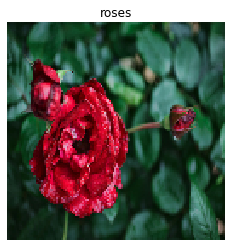

In [31]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

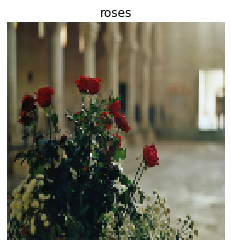

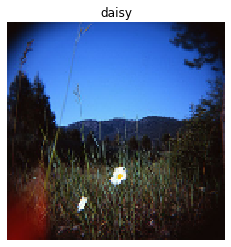

In [32]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
  show(image, label)

In [33]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
  image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


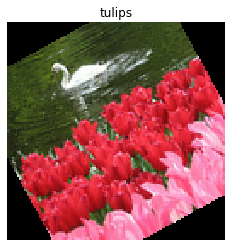

In [34]:
image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

# 对类别不平衡数据的处理

In [35]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip',
    fname='creditcard.zip',
    extract=True)

csv_path = zip_path.replace('.zip', '.csv')

In [36]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path, batch_size=1024, label_name="Class",
    # Set the column types: 30 floats and an int.
    column_defaults=[float()]*30+[int()])

In [37]:
def count(counts, batch):
  features, labels = batch
  class_1 = labels == 1
  class_1 = tf.cast(class_1, tf.int32)

  class_0 = labels == 0
  class_0 = tf.cast(class_0, tf.int32)

  counts['class_0'] += tf.reduce_sum(class_0)
  counts['class_1'] += tf.reduce_sum(class_1)

  return counts

In [38]:
counts = creditcard_ds.take(10).reduce(
    initial_state={'class_0': 0, 'class_1': 0},
    reduce_func = count)

counts = np.array([counts['class_0'].numpy(),
                   counts['class_1'].numpy()]).astype(np.float32)

fractions = counts/counts.sum()
print(fractions)

[0.9957 0.0043]


In [39]:
negative_ds = (
  creditcard_ds
    .unbatch()
    .filter(lambda features, label: label==0)
    .repeat())
positive_ds = (
  creditcard_ds
    .unbatch()
    .filter(lambda features, label: label==1)
    .repeat())

In [40]:
for features, label in positive_ds.batch(10).take(1):
  print(label.numpy())

[1 1 1 1 1 1 1 1 1 1]


方法一：tf.data.experimental.sample_from_datasets

In [41]:
balanced_ds = tf.data.experimental.sample_from_datasets(
    [negative_ds, positive_ds], [0.5, 0.5]).batch(10)

In [42]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

[0 0 1 0 0 0 0 1 0 0]
[0 0 1 1 1 0 1 0 0 1]
[0 1 1 1 1 1 0 0 1 0]
[1 0 1 1 1 1 0 1 0 0]
[0 1 0 0 0 1 0 1 1 0]
[1 0 0 1 1 0 1 1 0 1]
[0 1 0 1 1 0 0 1 0 1]
[1 1 0 0 1 0 0 1 1 1]
[0 0 1 0 1 0 1 1 1 1]
[0 0 0 1 0 1 1 0 0 0]


方法二：tf.data.experimental.rejection_resample

In [43]:
def class_func(features, label):
  return label

In [44]:
resampler = tf.data.experimental.rejection_resample(
    class_func, target_dist=[0.5, 0.5], initial_dist=fractions)

In [45]:
resample_ds = creditcard_ds.unbatch().apply(resampler).batch(10)

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



In [46]:
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

In [47]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

[1 1 0 0 1 1 1 0 1 1]
[1 0 0 0 1 1 1 0 1 1]
[0 1 1 0 0 1 0 0 0 0]
[1 1 1 0 0 1 1 1 1 0]
[0 1 0 0 0 0 1 1 1 1]
[0 1 1 0 1 1 1 0 0 1]
[0 0 0 0 1 0 0 1 1 1]
[0 1 0 0 1 1 0 0 1 1]
[1 0 0 1 0 1 0 1 0 0]
[1 0 0 0 1 0 0 0 1 1]


# 加载图片

下载数据集

In [48]:
data_root_orig = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

C:\Users\toki\.keras\datasets\flower_photos


检查数据集

In [49]:
for item in data_root.iterdir():
    print(item) 

C:\Users\toki\.keras\datasets\flower_photos\daisy
C:\Users\toki\.keras\datasets\flower_photos\dandelion
C:\Users\toki\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\toki\.keras\datasets\flower_photos\roses
C:\Users\toki\.keras\datasets\flower_photos\sunflowers
C:\Users\toki\.keras\datasets\flower_photos\tulips


In [50]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)
image_count = len(all_image_paths)
image_count

3670

In [51]:
all_image_paths[:10]

['C:\\Users\\toki\\.keras\\datasets\\flower_photos\\roses\\2949945463_366bc63079_n.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\sunflowers\\6606823367_e89dc52a95_n.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\dandelion\\14886963928_d4856f1eb6_n.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\daisy\\19865728236_a62f8f445b_n.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\tulips\\5700466891_2bcb17fa68_n.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\sunflowers\\15207507116_8b7f894508_m.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\sunflowers\\200557981_f800fa1af9.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\sunflowers\\5357144886_b78f4782eb.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\daisy\\9515186037_3be48fe68f.jpg',
 'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\daisy\\754248840_95092de274.jpg']

检查图片

In [52]:
import IPython.display as display

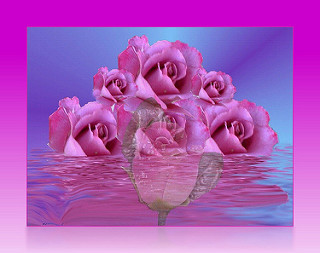

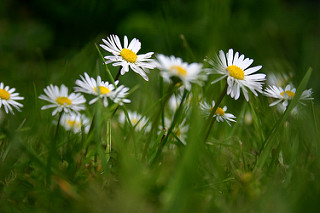

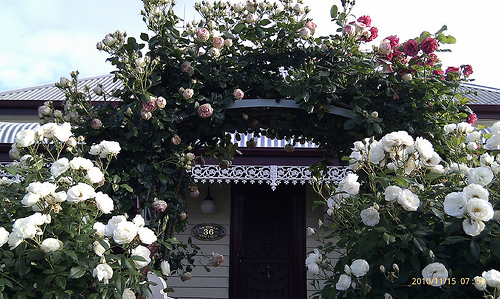

In [53]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path)) 

确定标签

列出可用的标签

In [54]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

为每个标签分配索引

In [55]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index 

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [56]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [2, 3, 1, 0, 4, 3, 3, 3, 0, 0]


加载和格式化图片

In [57]:
img_path = all_image_paths[0]
img_path

'C:\\Users\\toki\\.keras\\datasets\\flower_photos\\roses\\2949945463_366bc63079_n.jpg'

In [58]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...") 

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00...


In [59]:
img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

(267, 320, 3)
<dtype: 'uint8'>


In [60]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max()) 

(192, 192, 3)
0.0
1.0


In [61]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image) 

In [62]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image,[192, 192])
    # normalize to [0,1] range
    image = image/255.0
    return image

构建Dataset

In [63]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print(path_ds) 

<TensorSliceDataset shapes: (), types: tf.string>


In [64]:
image_ds = path_ds.map(load_and_preprocess_image)

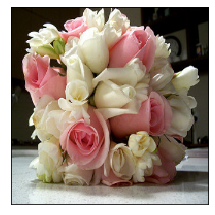

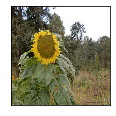

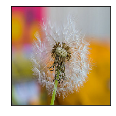

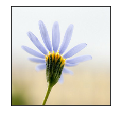

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show() 

In [66]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64)) 
for label in label_ds.take(10):
    print(label_names[label.numpy()]) 

roses
sunflowers
dandelion
daisy
tulips
sunflowers
sunflowers
sunflowers
daisy
daisy


由于这些数据集顺序相同，可以打包在一起得到一个(图片, 标签)对数据集，这个新数据集的维数（shapes）和类型（types）也是维数和类型的元组，用来描述每个字段

In [67]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds)) 
print(image_label_ds) 

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


# 想一想，练一练